# Neural Network Implementation using NumPy, Pandas, and Matplotlib on MNIST Dataset

## Problem Statement

In this Jupyter notebook, we will implement a neural network from scratch using only NumPy, Pandas, and Matplotlib to classify handwritten digits from the MNIST dataset. The neural network will follow a simple two-layer architecture.

### Neural Network Architecture:
- **Input Layer 𝑎[0]:** 
  - The input layer will have 784 units corresponding to the 784 pixels in each 28x28 input image.
  
- **Hidden Layer 𝑎[1]:** 
  - The hidden layer will have 10 units with ReLU activation function.
  
- **Output Layer 𝑎[2]:** 
  - The output layer will have 10 units corresponding to the ten digit classes with softmax activation function.

## Objectives:
1. Preprocess the MNIST dataset.
2. Implement the neural network architecture.
3. Train the neural network using backpropagation and gradient descent.
4. Evaluate the performance of the neural network on the test dataset.

## Dataset:
The MNIST dataset is a collection of 28x28 pixel grayscale images of handwritten digits (0-9). It consists of a training set of 42,000 examples.

## Tools:
- NumPy: For numerical computing and linear algebra operations.
- Pandas: For data manipulation and preprocessing.
- Matplotlib: For data visualization and plotting.

## Code:
__Import libraries__

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

__Import Training Data__

In [6]:
df = pd.read_csv("digit-recognizer/train.csv")

In [7]:
# Read dataset.
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.shape

(42000, 785)

To make the calculations easier, we will convert the DataFrame into numpy arrays.

In [9]:
data = np.array(df)
np.random.shuffle(data)

__Split Data__

In [10]:
rows, cols = df.shape       # (42000, 785)
size = int(rows * 0.1)

# Validation or Development Set
data_dev = data[0:size].T
X_dev = data_dev[1:cols]
X_dev = X_dev / 255
Y_dev = data_dev[0]

# Training Set
data_train = data[size:rows].T
X_train = data_train[1:cols]
X_train = X_train / 255
Y_train = data_train[0]

In [11]:
Y_train

array([4, 9, 0, ..., 9, 1, 5], dtype=int64)

In [12]:
print("Training:", X_train.shape, Y_train.shape)
print("Validation:", X_dev.shape, Y_dev.shape)

Training: (784, 37800) (37800,)
Validation: (784, 4200) (4200,)




__Initialise the parameters__

Create `init_params()` that initializes and returns four sets of random weights and biases for a neural network.

- `W1` and `b1` are the weights and biases for the first layer of the network, with 10 nodes and 784 input connections (for a 28x28 pixel image).
- `W2` and `b2` are the weights and biases for the second layer of the network, with 10 nodes and 10 input connections (for the output of the first layer).

Weights and biases are random numbers between -0.5 and 0.5, generated using NumPy's `rand()` method.

In [13]:
def init_params():

    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2

__Activation functions__

In [14]:
def ReLU(Z):
    """
    Applies the Rectified Linear Unit (ReLU) activation function element-wise to the input Z.

    Parameters:
    Z (numpy.ndarray): The input array.

    Returns:
    numpy.ndarray: The output of the ReLU function applied to Z.
    """

    return np.maximum(0,Z)

def softmax(Z):
    """
    Compute the softmax function on an input array.

    Parameters:
        Z (numpy.ndarray): The input array.

    Returns:
        numpy.ndarray: The output array after applying the softmax function.
    """
    
    return np.exp(Z) / sum(np.exp(Z))

__Helper Functions__

In [15]:
def one_hot(X):
    """
    Generates a one-hot encoding of the input array X.

    Parameters:
    X (numpy.ndarray): Input array to be one-hot encoded.

    Returns:
    numpy.ndarray: One-hot encoded array of shape (X.size, X.max() + 1).
    """

    one_hot_X = np.zeros((X.size, X.max() + 1))
    one_hot_X[np.arange(X.size), X] = 1
    one_hot_X = one_hot_X.T
    return one_hot_X

def ReLU_deriv(Z):
    """
    Calculates the derivative of the Rectified Linear Unit (ReLU) activation function. 
    It returns True where the input Z is greater than 0 and False otherwise.
    """

    return Z > 0

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Variables and shapes**

Forward propagation

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backpropagation

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

In [16]:
def forward_prop(W1, b1, W2, b2, X):

    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):

    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / rows * dZ2.dot(A1.T)
    db2 = 1 / rows * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / rows * dZ1.dot(X.T)
    db1 = 1 / rows * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2

__Gradient Descent__

Now we will implement gradient descent algorithm for training a neural network that iteratively updates the weights and biases of the network based on the calculated gradients to minimize the error. 

During each iteration, it performs forward propagation to compute the output and backward propagation to calculate the gradients. 

The weights and biases are then updated using the `update_params`. Additionally, it prints the iteration number and accuracy after every 50 iterations.

In [17]:
def get_prediction(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 50 == 0:
            pred = get_prediction(A2)
            print(f"iteration: {i} | Accuracy: {get_accuracy(pred, Y)}") 
            
    return W1, b1, W2, b2

In [18]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

iteration: 0 | Accuracy: 0.10375661375661376
iteration: 50 | Accuracy: 0.5223544973544973
iteration: 100 | Accuracy: 0.6701058201058201
iteration: 150 | Accuracy: 0.7325396825396825
iteration: 200 | Accuracy: 0.7702910052910052
iteration: 250 | Accuracy: 0.7981216931216931
iteration: 300 | Accuracy: 0.8161904761904762
iteration: 350 | Accuracy: 0.8297354497354498
iteration: 400 | Accuracy: 0.8404761904761905
iteration: 450 | Accuracy: 0.8478835978835979
iteration: 500 | Accuracy: 0.8539682539682539
iteration: 550 | Accuracy: 0.8598941798941799
iteration: 600 | Accuracy: 0.8645238095238095
iteration: 650 | Accuracy: 0.8678306878306878
iteration: 700 | Accuracy: 0.8710582010582011
iteration: 750 | Accuracy: 0.874021164021164
iteration: 800 | Accuracy: 0.8765079365079365
iteration: 850 | Accuracy: 0.8786507936507937
iteration: 900 | Accuracy: 0.8805026455026455
iteration: 950 | Accuracy: 0.8823544973544973


~ 88% accuracy on training set

In [19]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_prediction(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [0]
Label:  0


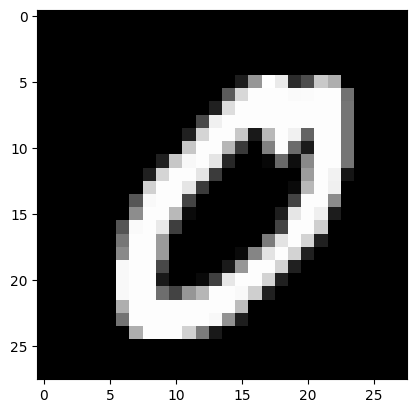

Prediction:  [9]
Label:  9


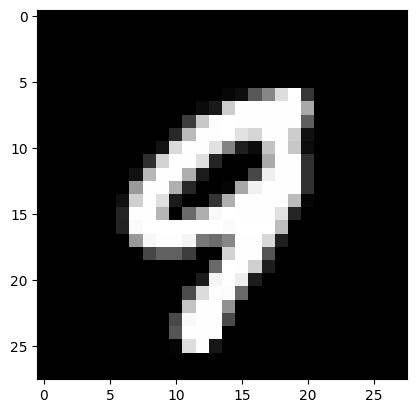

Prediction:  [7]
Label:  9


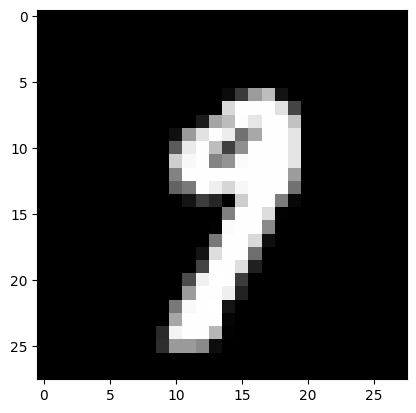

Prediction:  [6]
Label:  6


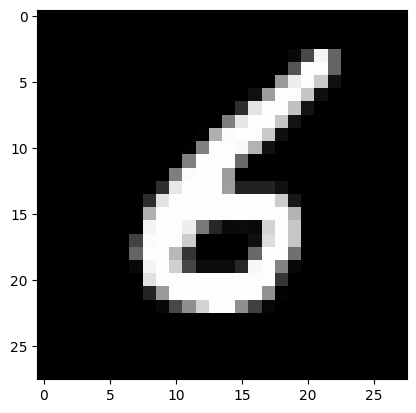

In [25]:
# Check for random labels
for i in np.random.randint(0, 100, size=4):
    test_prediction(i, W1, b1, W2, b2)


Finally, let's find the accuracy on the dev set:

In [21]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.8764285714285714

and about ~87% accuracy on the dev set too, so the model is generalized to the training set very well.